In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import urllib

In [5]:
req = urllib.request.urlopen('https://docs.opencv.org/3.4/water_coins.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv.imdecode(arr, cv.IMREAD_COLOR ) # 'Load it as grayscale'
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

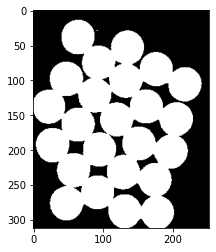

In [7]:
plt.imshow(thresh, cmap="gray")
plt.show()

Text(0.5, 1.0, 'sure_fg')

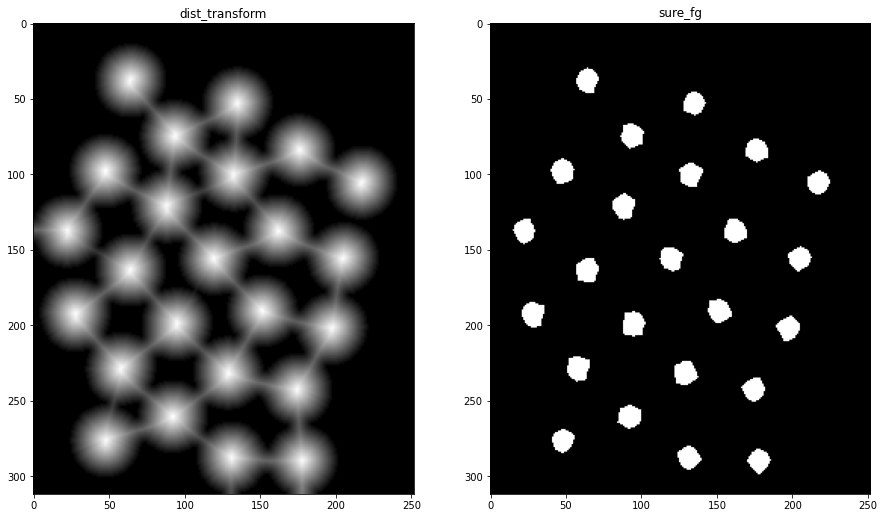

In [11]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)


# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
ax1.imshow(dist_transform, cmap="gray")
ax1.set_title("dist_transform")
ax2.imshow(sure_fg,cmap="gray")
ax2.set_title("sure_fg")

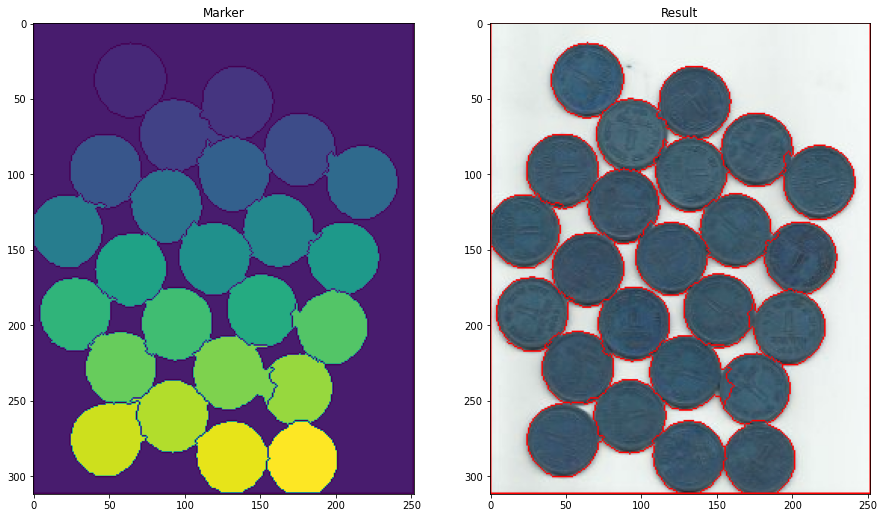

In [15]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
ax1.imshow(markers)
ax1.set_title("Marker")
ax2.imshow(img)
ax2.set_title("Result")

plt.show()